#### Real Time Object Detection Using Neural Networks

In [53]:
import numpy as np
import torch 
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms as T
import cv2
from PIL import Image
from matplotlib import pyplot as plt
!wget 'http://images.cocodataset.org/val2017...

#load model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained =  True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [80]:
test_img = Image.open("testimg1.jpg")
transform = T.ToTensor()
test_tensor = transform(test_img) 

In [81]:
with torch.no_grad():
    pred = model([test_tensor])


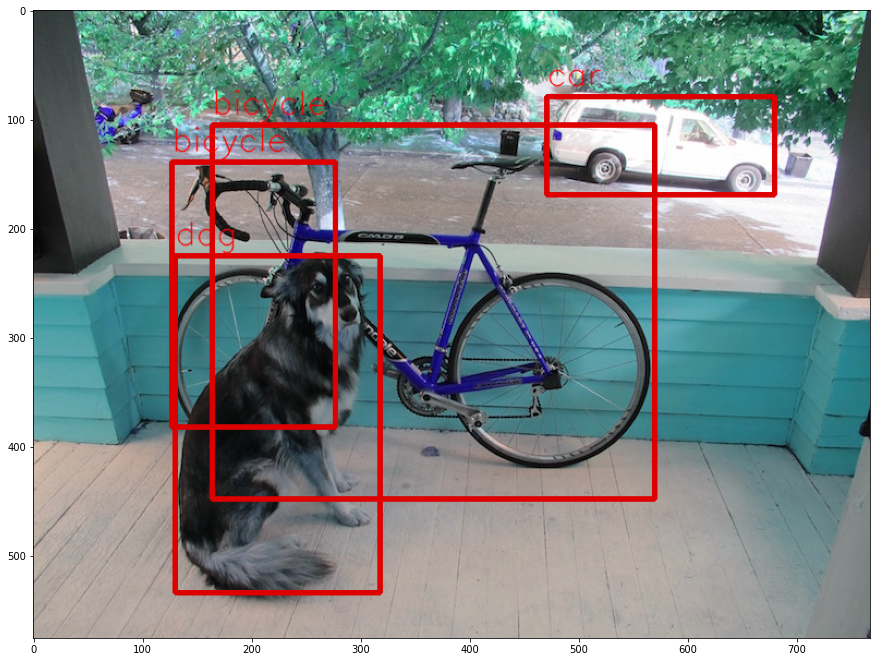

In [110]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

font = cv2.FONT_HERSHEY_SIMPLEX
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
bboxes = bboxes[scores >= 0.76]
labels = labels[scores >- 0.76]
scores = scores[scores >- 0.76]
igg = cv2.imread("testimg1.jpg")
for i in range(bboxes.shape[0]):
    box = bboxes[i]
    label = labels[i]
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg,
                  (int(box[0]), int(box[1])),
                  (int(box[2]), int(box[3])),
                  (220, 0, 0), 3)
    igg = cv2.putText(igg, class_name, (int(box[0]), int(box[1]) -10), font, 1, (2005,0,0), 1, cv2.LINE_AA)
plt.figure(figsize = (15,15))
plt.imshow(igg)

In [113]:
# Save image to folder
cv2.imwrite("detection1.PNG", igg)

True